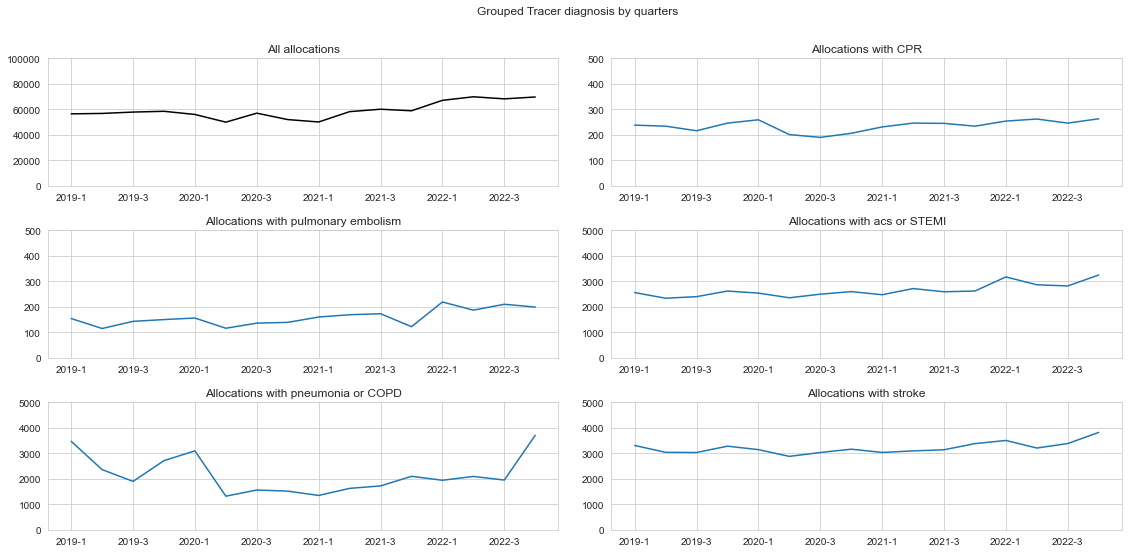

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/dgina23_tracer_by_quarter.csv')
df_transposed = df.set_index('quarter').transpose()

fig, axes = plt.subplots(3, 2, figsize = (16,8))

fig.suptitle('Grouped Tracer diagnosis by quarters')
fig.tight_layout(pad=2.5)

df_transposed['total'].plot(ax=axes[0,0], color="black", title="All allocations", ylim=[0,100000])
df_transposed['cpr'].plot(ax=axes[0,1], title="Allocations with CPR", ylim=[0,500])
df_transposed['pulmonary_embolism'].plot(ax=axes[1,0], title="Allocations with pulmonary embolism", ylim=[0,500])
df_transposed['acs_stemi'].plot(ax=axes[1,1], title="Allocations with acs or STEMI", ylim=[0,5000])
df_transposed['pneumonia_copd'].plot(ax=axes[2,0], title="Allocations with pneumonia or COPD", ylim=[0,5000])
df_transposed['stroke'].plot(ax=axes[2,1], title="Allocations with stroke", ylim=[0,5000])

plt.show();

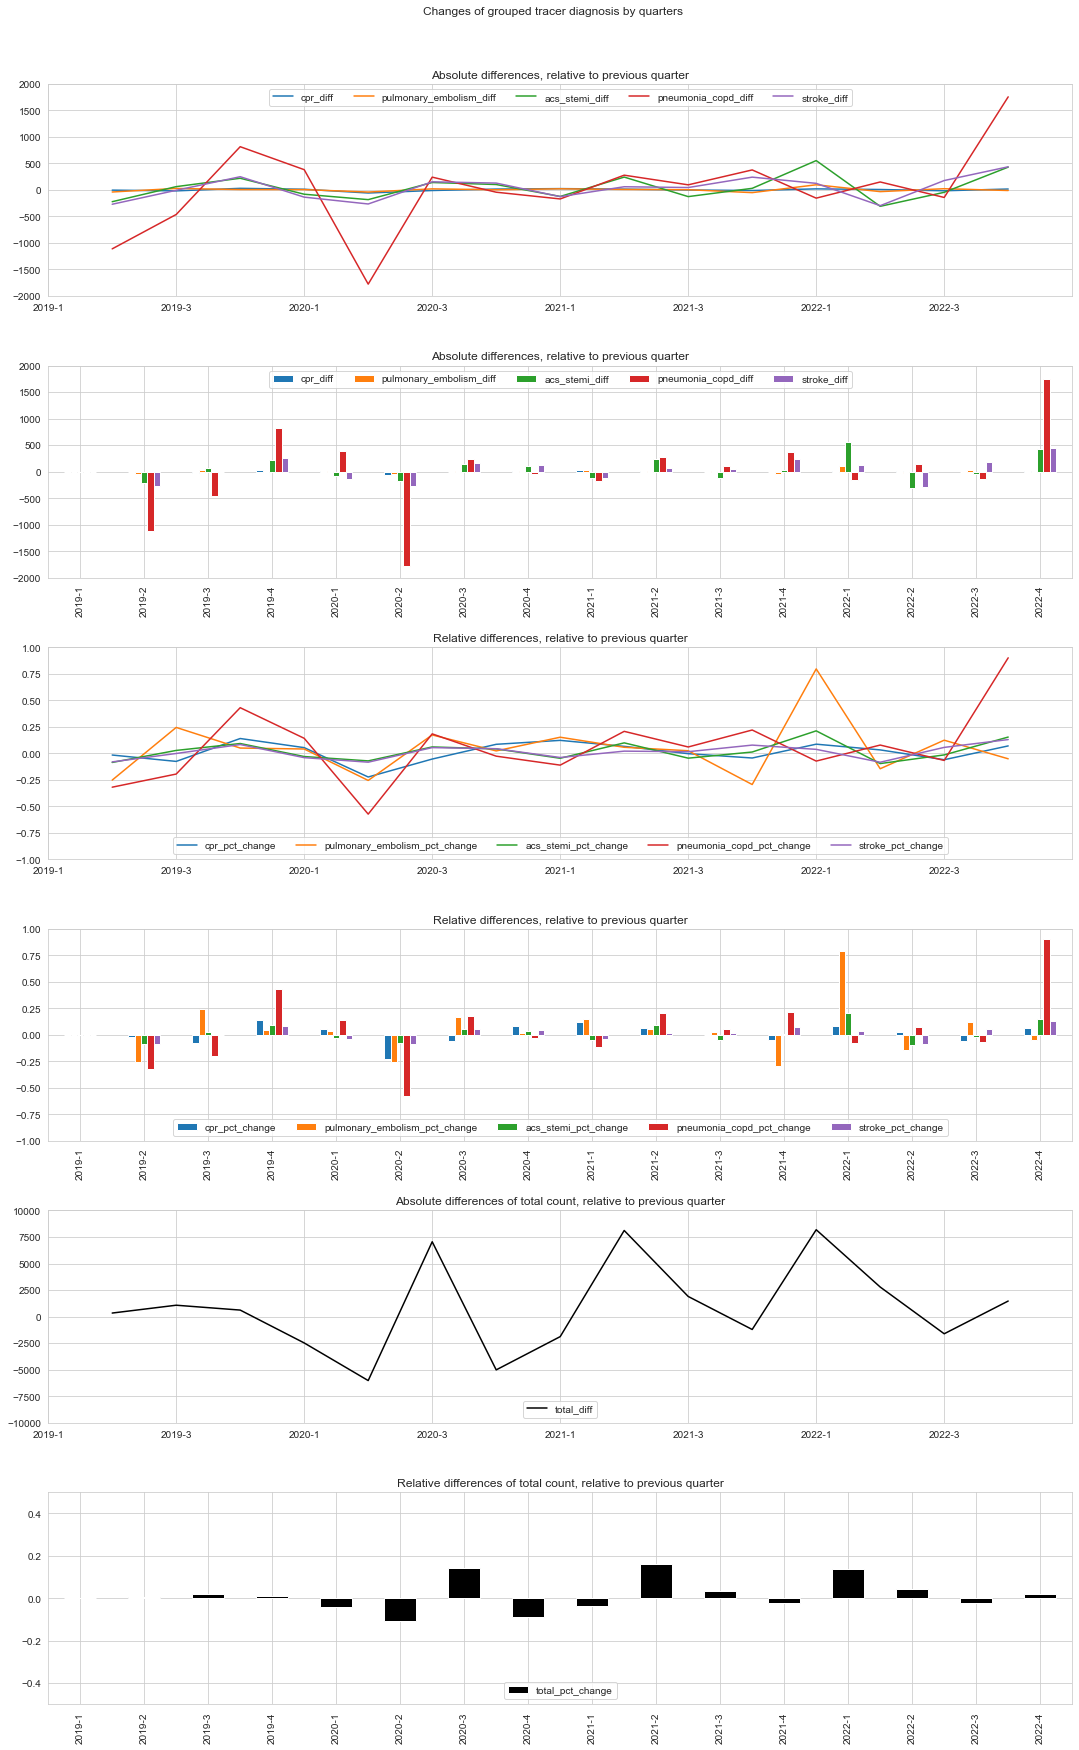

In [73]:
df_transposed['total_diff'] = df_transposed['total'].diff()
df_transposed['total_pct_change'] = df_transposed['total'].pct_change()
df_transposed['cpr_diff'] = df_transposed['cpr'].diff()
df_transposed['cpr_pct_change'] = df_transposed['cpr'].pct_change()
df_transposed['pulmonary_embolism_diff'] = df_transposed['pulmonary_embolism'].diff()
df_transposed['pulmonary_embolism_pct_change'] = df_transposed['pulmonary_embolism'].pct_change()
df_transposed['acs_stemi_diff'] = df_transposed['acs_stemi'].diff()
df_transposed['acs_stemi_pct_change'] = df_transposed['acs_stemi'].pct_change()
df_transposed['pneumonia_copd_diff'] = df_transposed['pneumonia_copd'].diff()
df_transposed['pneumonia_copd_pct_change'] = df_transposed['pneumonia_copd'].pct_change()
df_transposed['stroke_diff'] = df_transposed['stroke'].diff()
df_transposed['stroke_pct_change'] = df_transposed['stroke'].pct_change()

fig, [ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(6, 1, figsize = (16,25))

fig.suptitle('Changes of grouped tracer diagnosis by quarters')
fig.tight_layout(pad=5)

df_transposed[['cpr_diff', 'pulmonary_embolism_diff', 'acs_stemi_diff', 'pneumonia_copd_diff', 'stroke_diff']].plot(ax=ax1, ylim=[-2000,2000], legend="")
ax1.set_title('Absolute differences, relative to previous quarter')
ax1.legend(loc="upper center", ncol=5)
ax1.set_xticks(ax1.get_xticks()[::1])
df_transposed[['cpr_diff', 'pulmonary_embolism_diff', 'acs_stemi_diff', 'pneumonia_copd_diff', 'stroke_diff']].plot(kind="bar", ax=ax2, ylim=[-2000,2000], legend="")
ax2.set_title('Absolute differences, relative to previous quarter')
ax2.legend(loc="upper center", ncol=5)
ax2.set_xticks(ax2.get_xticks()[::1])

df_transposed[['cpr_pct_change', 'pulmonary_embolism_pct_change', 'acs_stemi_pct_change', 'pneumonia_copd_pct_change', 'stroke_pct_change']].plot(ax=ax3, ylim=[-1,1], legend="")
ax3.legend(loc="lower center", ncol=5)
ax3.set_xticks(ax3.get_xticks()[::1])
ax3.set_title('Relative differences, relative to previous quarter')
df_transposed[['cpr_pct_change', 'pulmonary_embolism_pct_change', 'acs_stemi_pct_change', 'pneumonia_copd_pct_change', 'stroke_pct_change']].plot(kind="bar", ax=ax4, ylim=[-1,1], legend="")
ax4.legend(loc="lower center", ncol=5)
ax4.set_xticks(ax4.get_xticks()[::1])
ax4.set_title('Relative differences, relative to previous quarter')

df_transposed['total_diff'].plot(kind="line", ax=ax5, ylim=[-10000,10000], legend="", color="black")
ax5.legend(loc="lower center", ncol=5)
ax5.set_xticks(ax5.get_xticks()[::1])
ax5.set_title('Absolute differences of total count, relative to previous quarter')
df_transposed['total_pct_change'].plot(kind="bar", ax=ax6, ylim=[-0.5,0.5], legend="", color="black")
ax6.legend(loc="lower center", ncol=5)
ax6.set_xticks(ax6.get_xticks()[::1])
ax6.set_title('Relative differences of total count, relative to previous quarter');

In [55]:
df_transposed[['total_diff', 'cpr_diff', 'pulmonary_embolism_diff', 'acs_stemi_diff', 'pneumonia_copd_diff', 'stroke_diff']]

quarter,total_diff,cpr_diff,pulmonary_embolism_diff,acs_stemi_diff,pneumonia_copd_diff,stroke_diff
2019-1,NaN,NaN,NaN,NaN,NaN,NaN
2019-2,331.0,-4.0,-39.0,-222.0,-1111.0,-270.0
2019-3,1069.0,-18.0,28.0,62.0,-463.0,-7.0
2019-4,611.0,30.0,7.0,220.0,815.0,249.0
2020-1,-2487.0,13.0,6.0,-81.0,382.0,-136.0
2020-2,-6033.0,-58.0,-40.0,-183.0,-1776.0,-265.0
2020-3,7052.0,-11.0,20.0,140.0,241.0,153.0
2020-4,-5026.0,16.0,3.0,102.0,-43.0,129.0
2021-1,-1891.0,25.0,21.0,-123.0,-170.0,-127.0
2021-2,8115.0,15.0,9.0,242.0,278.0,60.0


In [56]:
df_transposed[['total_pct_change', 'cpr_pct_change', 'pulmonary_embolism_pct_change', 'acs_stemi_pct_change', 'pneumonia_copd_pct_change', 'stroke_pct_change']]

quarter,total_pct_change,cpr_pct_change,pulmonary_embolism_pct_change,acs_stemi_pct_change,pneumonia_copd_pct_change,stroke_pct_change
2019-1,NaN,NaN,NaN,NaN,NaN,NaN
2019-2,0.005863,-0.016807,-0.253247,-0.086753,-0.319988,-0.081620
2019-3,0.018824,-0.076923,0.243478,0.026530,-0.196103,-0.002304
2019-4,0.010560,0.138889,0.048951,0.091705,0.429399,0.082151
2020-1,-0.042535,0.052846,0.040000,-0.030928,0.140804,-0.041463
2020-2,-0.107765,-0.223938,-0.256410,-0.072104,-0.573829,-0.084288
2020-3,0.141181,-0.054726,0.172414,0.059448,0.182714,0.053143
2020-4,-0.088172,0.084211,0.022059,0.040882,-0.027564,0.042546
2021-1,-0.036382,0.121359,0.151079,-0.047362,-0.112063,-0.040177
2021-2,0.162025,0.064935,0.056250,0.097817,0.206385,0.019776
